# **Encaminhamentos**

1. Reimplementar a técnica com os dados do autor:
     - verificar se a plotagem é similar a que ele fez;
     - dica: cada um implementar individualmente e se ajudar quando uma dúvida surgir;
2. Verificar o problema relacionado ao treinamento com os dados de Covid-19.
---


## **Implementações de referência:** 
-  **[Link 1:](https://www.youtube.com/watch?v=GFSiL6zEZF0)**
-  **[Link 2:](https://www.youtube.com/watch?v=PuZY9q-aKLw)**

---



# \#1. Importando as bibliotecas

In [71]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [72]:
# !pip install pandas
# !pip install numpy
# !pip install datetime
# !pip install matplotlib
# !pip install sklearn
# !pip install tensorflow
# !pip install keras
# !pip install pandas_datareader

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016, 1, 1)
end = dt.datetime(2021, 4 , 1)

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

# \#2. Manipulando os dados

In [75]:
#prepare Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [76]:
prediction_days = 60
future_days = 30

x_train, y_train = [], []

# for x in range(prediction_days, len(scaled_data)):
#   x_train.append(scaled_data[x-prediction_days: x, 0])
#   y_train.append(scaled_data[x, 0])

for x in range(prediction_days, len(scaled_data) - future_days):
  x_train.append(scaled_data[x-prediction_days: x, 0])
  y_train.append(scaled_data[x, 0])

In [77]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# \#3. Craindo e treinando o modelo

In [78]:
model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

#model.compile(optimizer='adam', loss='mse')
#model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
58/58 [==============================] - 9s 89ms/step - loss: 0.0036
Epoch 2/25
58/58 [==============================] - 5s 88ms/step - loss: 0.0013
Epoch 3/25
58/58 [==============================] - 5s 88ms/step - loss: 0.0013
Epoch 4/25
58/58 [==============================] - 5s 87ms/step - loss: 8.5267e-04
Epoch 5/25
58/58 [==============================] - 5s 88ms/step - loss: 9.7444e-04
Epoch 6/25
58/58 [==============================] - 5s 88ms/step - loss: 7.8924e-04
Epoch 7/25
58/58 [==============================] - 5s 88ms/step - loss: 0.0011
Epoch 8/25
58/58 [==============================] - 5s 88ms/step - loss: 7.1750e-04
Epoch 9/25
58/58 [==============================] - 5s 89ms/step - loss: 6.4803e-04
Epoch 10/25
58/58 [==============================] - 5s 89ms/step - loss: 7.7990e-04
Epoch 11/25
58/58 [==============================] - 5s 90ms/step - loss: 5.6889e-04
Epoch 12/25
58/58 [==============================] - 5s 89ms/step - loss: 6.5842e-04
Epoch

In [81]:
test_start = dt.datetime(2020, 1 , 1)
test_end = dt.datetime(2021, 4 , 6)

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

# \#4. Plotando predição

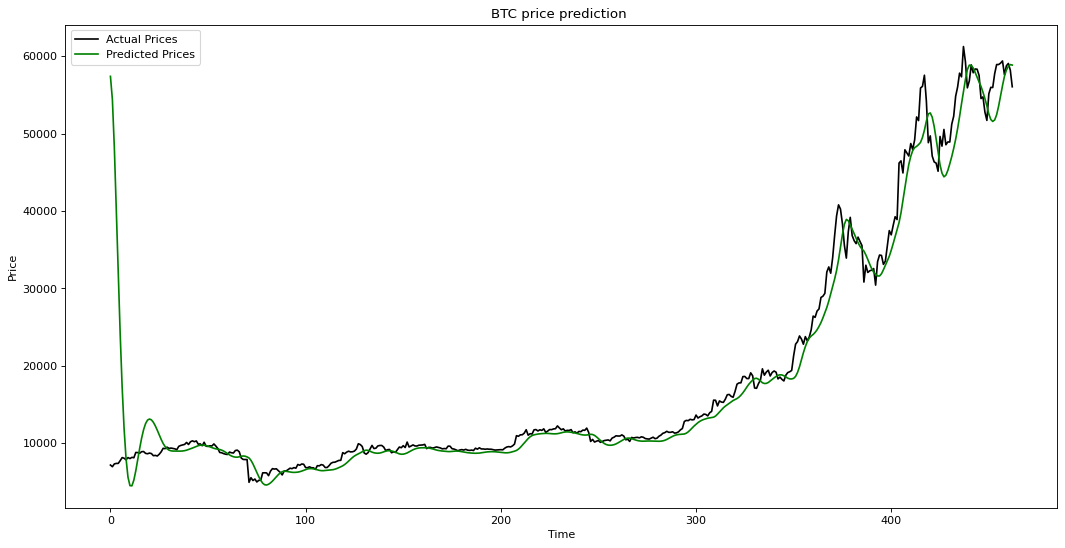

In [82]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# \#5. Prevendo novo dia

In [91]:
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]]
#real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs), 0]]
#real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1 , 0]]
#real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]

real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[58406.902]]


## Teste

In [ ]:
print("tamanho1:", len(model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs), 0]))
print("tamanho2:", len(model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]))
print("tamanho3:", len(model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]))
print("tamanho4:", len(model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]))

tamanho1: 59
tamanho2: 60
tamanho3: 59
tamanho4: 60
